In [40]:
import pandas as pd

df=pd.read_csv('C:/Users/H.A/Downloads/kc_house_data.csv')
print(df.head())
print(df.shape)
df['grade'].value_counts()

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [41]:
print(df. isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [43]:
from sklearn.preprocessing import StandardScaler
features = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built']
x = df.loc[:, features].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[-0.86671733, -0.97983502, -0.22832133, -0.73470764, -0.65868104,
        -0.54489777],
       [-0.00568792,  0.53363434, -0.18988538,  0.46084084,  0.2451414 ,
        -0.6810785 ],
       [-0.98084935, -1.42625404, -0.12329847, -1.22983377, -0.65868104,
        -1.29389179],
       ...,
       [-0.37586519, -1.15404732, -0.33213703, -0.92792759, -0.65868104,
         1.29354209],
       [-0.38158814, -0.52252773, -0.30707641, -0.22750526, -0.65868104,
         1.12331618],
       [-0.58588173, -1.15404732, -0.33875227, -0.92792759, -0.65868104,
         1.25949691]])

In [44]:
import numpy as np
cov_data = np.corrcoef(x.T)
cov_data

array([[ 1.        ,  0.70203505,  0.08966086,  0.6055673 ,  0.32381602,
         0.05401153],
       [ 0.70203505,  1.        ,  0.17282566,  0.8765966 ,  0.43504297,
         0.31804877],
       [ 0.08966086,  0.17282566,  1.        ,  0.18351228,  0.0152862 ,
         0.05308037],
       [ 0.6055673 ,  0.8765966 ,  0.18351228,  1.        , -0.05194331,
         0.42389835],
       [ 0.32381602,  0.43504297,  0.0152862 , -0.05194331,  1.        ,
        -0.1331241 ],
       [ 0.05401153,  0.31804877,  0.05308037,  0.42389835, -0.1331241 ,
         1.        ]])

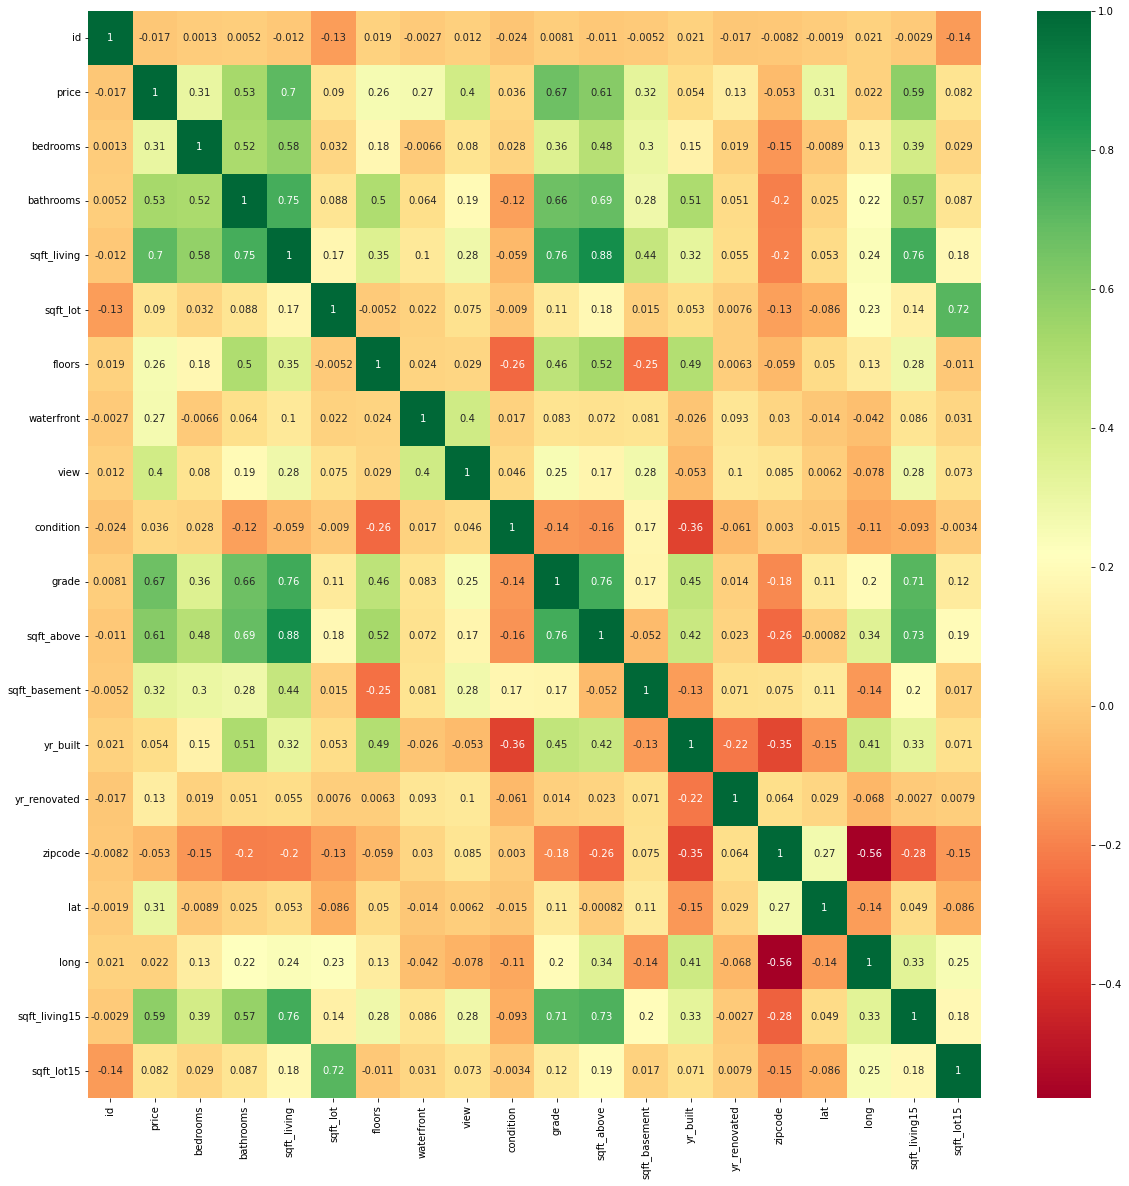

In [45]:
import seaborn as sns

plt.figure(figsize=(20,20))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')

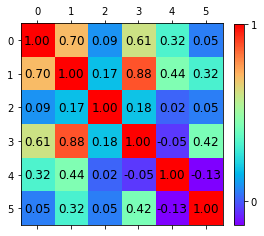

In [46]:
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()


In [47]:
print("price/sqft_living and  price/sqft_above are the most strong relation")
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, df[['grade']]], axis = 1)
finalDf

price/sqft_living and  price/sqft_above are the most strong relation


,principal component 1,principal component 2,grade
0,-1.698679,-0.204854,7
1,0.414260,0.512106,7
2,-2.452961,0.298283,6
3,-0.274361,1.407656,7
4,-0.393832,-0.783866,8
...,...,...,...
21608,-0.627148,-1.272727,8
21609,0.493775,-1.550470,8
21610,-1.230404,-1.120028,7
21611,-0.521040,-1.165492,8


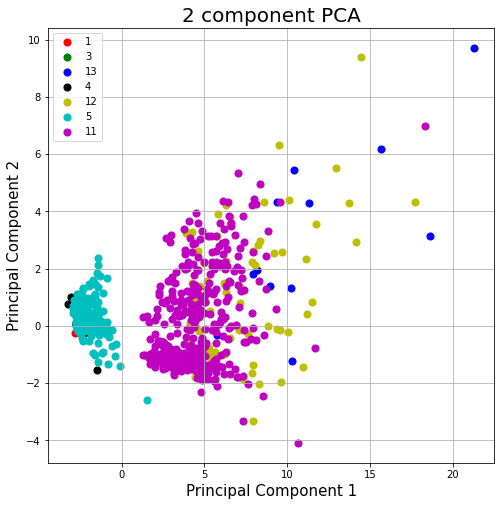

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,3,13,4,12,5,11,10,6,9,8,7]
colors = ['r', 'g', 'b','k','y','c','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [49]:
print("price and sqft_living are the most  important features becaude corrcoef=0,7")

price and sqft_living are the most  important features becaude corrcoef=0,7


In [65]:
from sklearn.model_selection import train_test_split
#extract x and y from our data
x1=df["sqft_living"].values[:,np.newaxis]
y1=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.35,random_state=40) #splitting data with test size of 35%

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


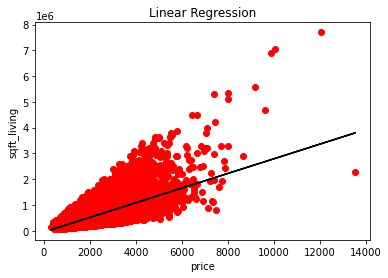

In [67]:
plt.scatter(x1,y1,color="r")
plt.title("Linear Regression")
plt.ylabel("sqft_living")
plt.xlabel("price")
plt.plot(x1,model.predict(x1),color="k")
plt.show()

In [69]:
#extract x and y from our data
x2=df[["sqft_living","grade"]]  #we have more than one input
y2=df["price"].values
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.35,random_state=40) #splitting data with test size of 35%
model2=LinearRegression() #build linear regression model
model2.fit(x2_train,y2_train) #fitting the training data
predicted2=model2.predict(x2_test) #testing our model’s performance
print("MSE", mean_squared_error(y2_test,predicted2))
print("R squared", metrics.r2_score(y2_test,predicted2))

MSE 57413775762.86427
R squared 0.5433112989852685


In [70]:
print("multi-linear regression is more performance than the linear model")

multi-linear regression is more performance than the linear model


In [85]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
x3=df[["sqft_living","grade"]]  #we have more than one input
y3=df["price"].values
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x3_train_fit = poly.fit_transform(x3_train) #transforming our input data
lg.fit(x3_train_fit, y3_train)
x3_test_ = poly.fit_transform(x3_test)
predicted3 = lg.predict(x3_test_)
print("MSE: ", metrics.mean_squared_error(y3_test, predicted3))
print("R squared: ", metrics.r2_score(y3_test,predicted3))

MSE:  50394480701.169464
R squared:  0.5991451594337561
